# PMT Linear Range

In [1]:
from LicelReader.LicelReader import *
from LicelReader.LicelUtil import *
import matplotlib.pyplot as pp
import numpy as np
pp.rcParams['figure.figsize'] = [14, 8]

## Example tube BVB2912

In [2]:
pmt_signal = LicelFileReader('N2451414.441744')

In [3]:
# constant definition
analog_idx = 0
pc_idx = 1
deadTime_ns = 3.0
minToggle_MHz = 1.0
maxToggle_MHz = 10.0
binshift = 1

In [4]:
# signal prep
pc_raw = pmt_signal.dataSet[pc_idx].physData
analog = pmt_signal.dataSet[analog_idx].physData*1000 # mV
[glued, analog_scaled, pc_corr, pc_shifted, m, b, fit_error] = glue_profiles(analog,pc_raw, binshift, deadTime_ns,  minToggle_MHz, maxToggle_MHz, 0)

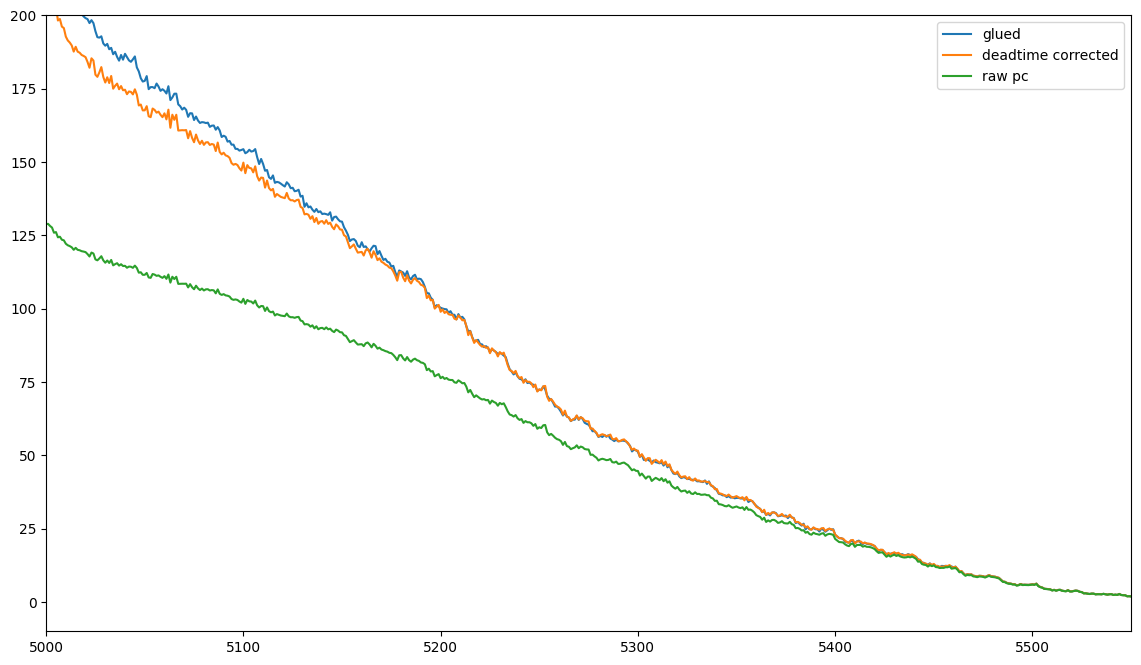

In [5]:
fig, ax = pp.subplots()

ax.plot(glued, label = "glued")
ax.plot(pc_corr, label = "deadtime corrected")
ax.plot(pc_shifted, label = "raw pc")
ax.set_xlim(5000, 5550)
ax.set_ylim(-10,200)
pp.legend()
pp.show()

In [6]:
start_idx = 3000
stop_idx = 8000
raw_sl = pc_shifted[start_idx:stop_idx]
corr_sl = pc_corr[start_idx:stop_idx]
glued_sl = glued[start_idx:stop_idx]

In [7]:
# avoid division by 0
raw_cl = raw_sl.clip(0.0000001, 100000)
corr_cl = corr_sl.clip(0.0000001, 100000)
glued_cl = glued_sl.clip(0.0000001, 100000)

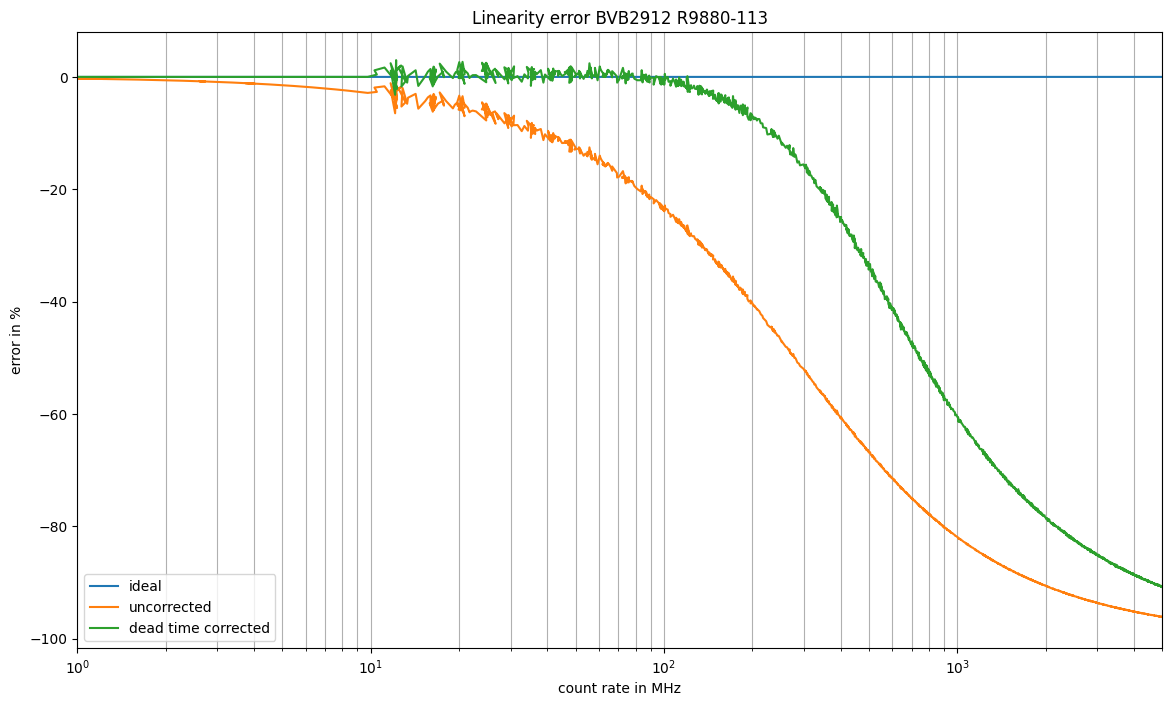

In [8]:
fig, ax = pp.subplots()
ax.semilogx(glued_cl, 0 * np.ones(glued_cl.size), label = "ideal")
ax.semilogx(glued_cl, ( raw_cl/glued_cl - np.ones(glued_cl.size) )* 100, label ="uncorrected")
ax.semilogx(glued_cl,     (corr_cl/glued_cl - np.ones(glued_cl.size) )*100, label = "dead time corrected")
ax.set_xlim(1,5000)
pp.title("Linearity error BVB2912 R9880-113")
ax.set_xlabel("count rate in MHz")
ax.set_ylabel("error in %")
pp.grid(axis = 'x', which="both")
pp.legend()
pp.show()

In [9]:
kernel_size = 20
kernel = np.ones(kernel_size) / kernel_size
skip_idx = 200
glued_sm = np.convolve(glued_cl, kernel, mode='same')[skip_idx:]
corr_sm = np.convolve(corr_cl, kernel, mode='same')[skip_idx:]
raw_sm = np.convolve(raw_cl, kernel, mode='same')[skip_idx:]


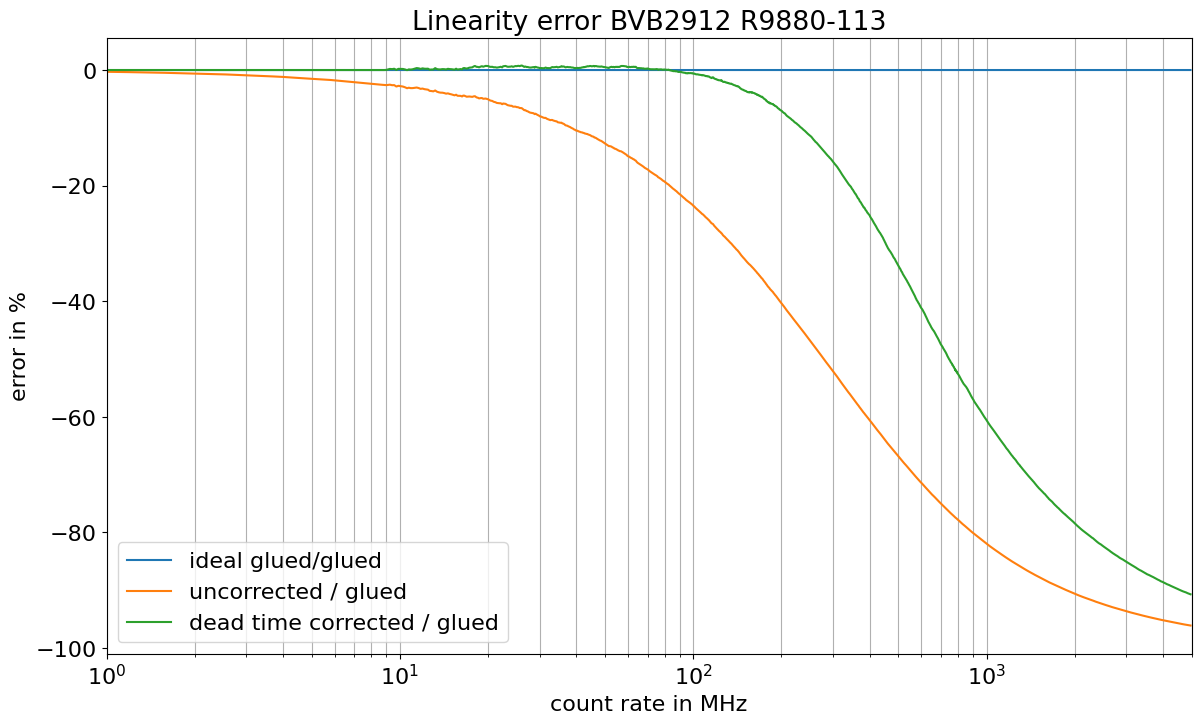

In [11]:
pp.rcParams['font.size'] = 16
fig, ax = pp.subplots()
ax.semilogx(glued_sm, 0 * np.ones(glued_sm.size), label = "ideal glued/glued")
ax.semilogx(glued_sm, ( raw_sm/glued_sm - np.ones(glued_sm.size) )* 100, label ="uncorrected / glued")
ax.semilogx(glued_sm,     (corr_sm/glued_sm - np.ones(glued_sm.size) )*100, label = "dead time corrected / glued")
ax.set_xlim(1,5000)
pp.title("Linearity error BVB2912 R9880-113")
ax.set_xlabel("count rate in MHz")
ax.set_ylabel("error in %")
pp.grid(axis = 'x', which="both")
pp.legend()
pp.show()